In [1]:
from qiskit_ionq import IonQProvider, ionq_job
ionq_provider = IonQProvider("mycsEhnoIgARQdch53Zm7KJUePwFD0Wr")
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
from matplotlib import pyplot as plt
import numpy as np
import time

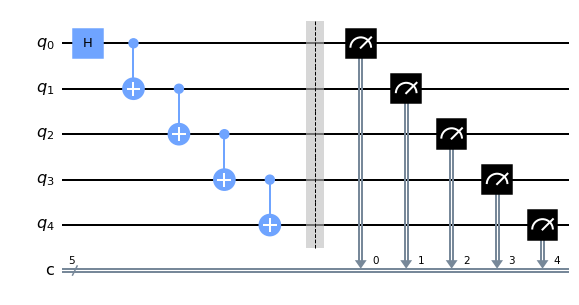

In [2]:
qr = QuantumRegister(5,'q')
cr = ClassicalRegister(5,'c')
qc = QuantumCircuit(qr,cr)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)
qc.cx(3,4)

qc.measure_all(add_bits=False)
qc.draw(output='mpl')

In [3]:
sim_backend = ionq_provider.get_backend('ionq_simulator')

qpu_backend = ionq_provider.get_backend('ionq_qpu')

In [4]:
ID=[]

In [5]:
row=[]
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                for m in range(2):
                    row.append(str(i)+str(j)+str(k)+str(l)+str(m))


In [6]:
job = qpu_backend.run(qc,shots = 1024)
n=0
while n!=50:
    if job.status().name == 'DONE':
        ID.append(job.job_id())
        job = qpu_backend.run(qc,shots = 1024)
        n+=1
    else:
        time.sleep(500)

In [12]:
ID

['11eefa8a-b43a-47f6-a16c-4368dcfc3652',
 '0a32f5a1-a27d-4ce7-97fb-399ecc016cd7',
 'eb366595-12e8-42dc-86a7-8d22ccd3e69d',
 '23cc6eb9-c8b3-49e8-92d7-6c3d42b189a5',
 '2780ff82-dd6a-4e1f-91fb-0fab79fda263',
 'df7441aa-ca3f-4955-84d6-7c7e1d4b1b43',
 'e29d1e3c-ed68-4ef3-8dc5-4a3bc38280ec',
 '42e07ff0-99dd-486b-832e-6bd931b9dca4',
 '78bfa534-deef-4e16-9766-3790ee6ba9b7',
 '072ef507-cd9f-4fed-866c-eb0a9ce3dd58',
 'ed205595-1441-4a2e-92ff-4efeb4e5581d',
 'db866175-aef4-49db-a073-f2cd89c68897',
 'd64ee00c-9cab-4994-934c-46d1e63dd241',
 '913ac440-ed54-45df-bf17-c2326a59db82',
 '050c8f5b-e8c4-415a-aa7a-855b93facc5d',
 'f88efb7c-e353-4ee5-8236-afc8608ab53b',
 'f78d7546-49af-4b4b-9aea-988586221658',
 '5593c1c5-ef21-4eeb-bec0-2be9a2560e9f',
 '697ccadd-31af-444d-9226-74bd17b6f11f',
 'd78ab4e7-7cce-42ba-837a-968436c3e5a8',
 '6832eab3-d794-48ca-b92e-ae92adc8cb85',
 'b736709f-b4a4-4d52-b716-bc7fb405491c',
 '8c37a764-b020-4325-a3e6-31d7d4d89a90',
 '8c69327f-800a-4942-8c16-7460ea0565b9',
 '84e5a738-c4b5-

In [17]:
f = open("C:/Users/cbk92/Desktop/VSC_code/IONQ/ID.txt",'w')

for i in range(50):
    f.write(ID[i])
    f.write('\n')

f.close()


In [9]:
for i in range(50):
    job_ret = qpu_backend.retrieve_job(ID[i])
    probs = job_ret.get_probabilities()
    counts = job_ret.get_counts()
    for k in range(32):
        if row[k] not in probs.keys():
            probs[row[k]] = 0
    probs_tup = sorted(probs.items())
    probs_list = []
    for j in range(32):
        a=probs_tup[j][1]
        probs_list.append(a)
    probs_arr = np.array(probs_list)
    if i == 0:
        all_probs = probs_arr
    else:
        all_probs = np.vstack((all_probs,probs_arr))

In [1]:
plt.figure(figsize=(15,15))
plt.imshow(all_probs,cmap='gray')
plt.clim(0,0.6)
plt.xticks(range(len(row)),labels=row,rotation=90,fontsize = 8)
plt.xlabel('output state')
plt.ylabel('number of iteration')
plt.title('GHZ 5Q')

cbar = plt.colorbar()
cbar.set_label('probability')
plt.show()

NameError: name 'plt' is not defined